In [1]:
import sys
sys.path.append('C:\\0_Academy\\VScode\\00_Function\\')
import datetime
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pydotplus as pydot
import statsmodels.api as sm
from reliability.Fitters import Fit_Weibull_Mixture
from reliability.Fitters import Fit_Weibull_2P,Fit_Weibull_3P,Fit_Gamma_2P,Fit_Gamma_3P,Fit_Lognormal_2P
from reliability.Distributions import Weibull_Distribution,Gamma_Distribution,Lognormal_Distribution
from sklearn import mixture

# Read Data

In [2]:
#read file
from A1_read_data import read_csv_data
folder = '1.1 ALL windspeed/'
file_name = 'WIND_95m_1605-1912.csv'
data = read_csv_data(folder,file_name)

Import 'WIND_95m_1605-1912.csv'Done


In [173]:
def HistogramPLOT(data,month,year):
    #Initiate
    mon = ["01","02","03","04","05","06","07","08","09","10","11","12"]
    #mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    x_dic=[0.3,0.4965,0.69158,0.888]
    y_dic=[0.842,0.586,0.33]
    props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.5)
    data01 = data[['DateTime','WS95']].copy()
    data01.dropna(how='any',inplace=True)
    logicY = (data01["DateTime"].apply(lambda x: x.year)==(year))
    data01 = data01[logicY].copy()
    fig, ax = plt.subplots(3,4, sharex=True, sharey=True, figsize=(18,13), gridspec_kw = {'wspace':0.05, 'hspace':0.05})
    #Plotting 12 graph
    for i in range(month):
        #print("Month-{}",format(i))
        j= int(np.floor(i/4))
        k=int(i%4) 
        logic = (data01["DateTime"].apply(lambda x: x.month))==(i+1)
        ws = data01['WS95'][logic]
        if (np.sum(logic)!=0):
            ax[j,k].hist(ws,bins=30,density=True)
            
        ax[j,k].set_ylim(0,0.18)
        ax[j,k].set_xlim(0,32)
        ax[j,k].set_xticks([0,5,10,15,20,25,30])
        ax[j,k].tick_params(axis="x", labelsize=22)
        ax[j,k].tick_params(axis="y", labelsize=22)
        ax[j,k].grid(True)
        fig.text(x_dic[k],y_dic[j],mon[i],ha='right',size=30,bbox=props)
        #ax[j,k].set_title('{}'.format(mon[i]),loc='right')
    #fig.tight_layout()
    fig.text(0.5, 0.07,'Wind Speed (m/s)', ha='center',size=30)
    fig.text(0.5, 0.89 ,'Histogram (Year {})'.format(year), ha='center',size=30)
    fig.text(0.059, 0.5,'Probability Density', va='center', rotation='vertical',size=30)
    
    plt.show()


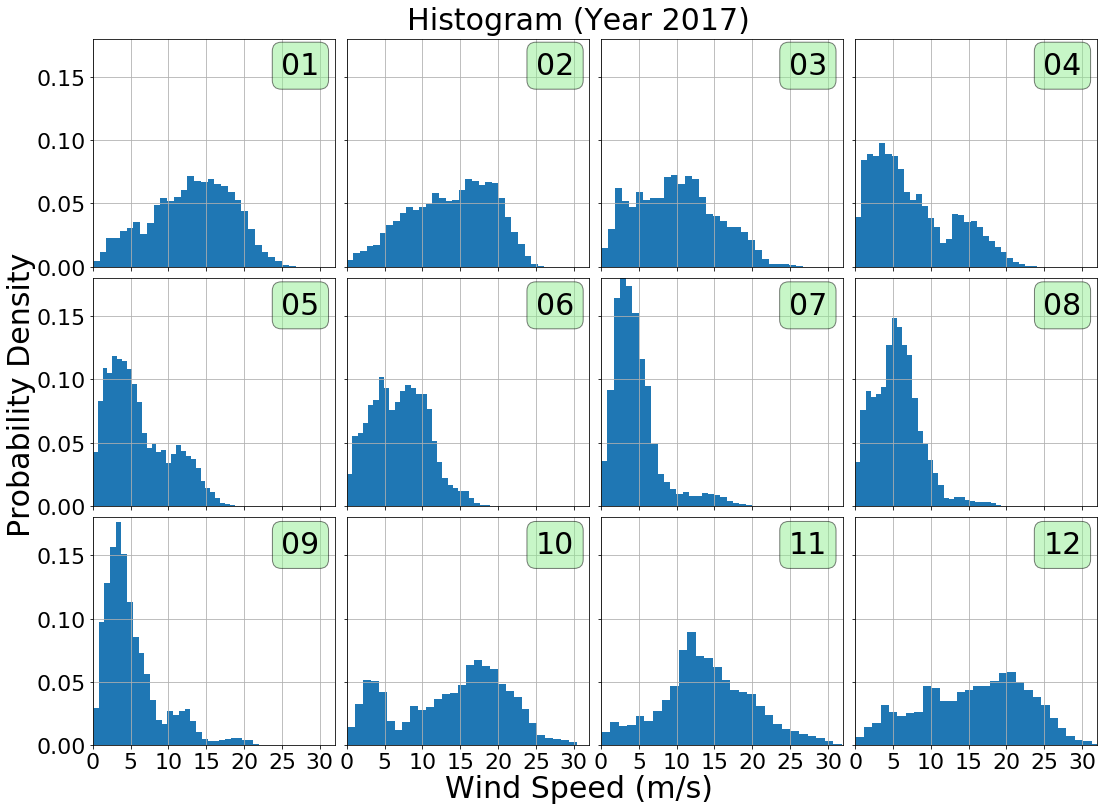

In [174]:
HistogramPLOT(data,12,2017)

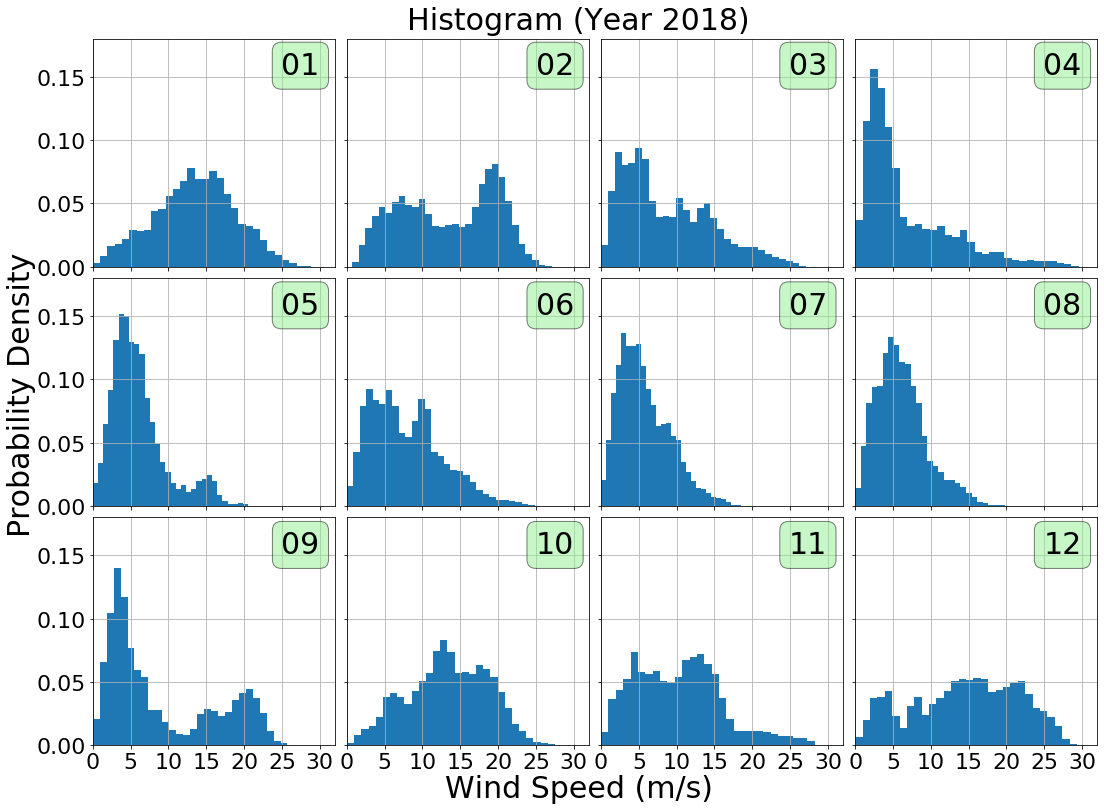

In [175]:
HistogramPLOT(data,12,2018)

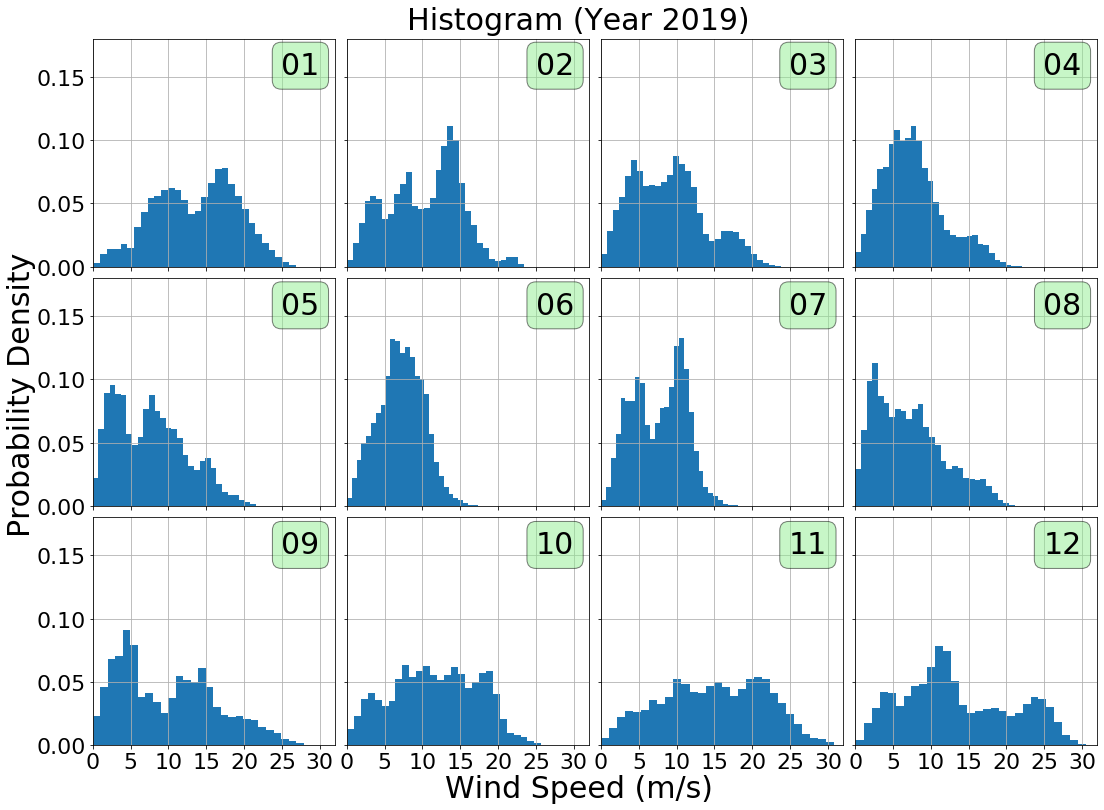

In [176]:
HistogramPLOT(data,12,2019)

# Season

In [155]:
data01 = data[['DateTime','WS95']].copy()
data01['Month']  = data['DateTime'].apply(lambda x: x.month)
seasons = [(month%12 + 3)//3 for month in range(1, 13)]
month_to_season = dict(zip(range(1,13), seasons))
data01['Season']= data01['Month'].apply(lambda x:month_to_season[x])
df = data01.dropna(how='any')

In [30]:
def Histogram_Season(data,year,season):
    #Initiate
    Seasons= {1:'Winter',2:'Spring',3:'Summer',4:'Autumn',}
    logicY = (data["DateTime"].apply(lambda x: x.year)==(year))
    data01 = data[logicY].copy() 
    fig, (ax) = plt.subplots(1, 1,figsize=(10, 10), gridspec_kw = {'wspace':0, 'hspace':0})
    #Plotting 12 graph
    logic = (data01["Season"]==(season))
    ws = data01['WS95'][logic]
    if (np.sum(logic)!=0):
        ax.hist(ws,bins=30,density=True)
    ax.set_ylim(0,0.14)
    ax.set_xlim(0,30)
    ax.set_xticks([0,5,10,15,20,25,30])
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.set_title('{}'.format(Seasons[season]),fontweight='bold',size=30)
    plt.tight_layout()
    plt.show()


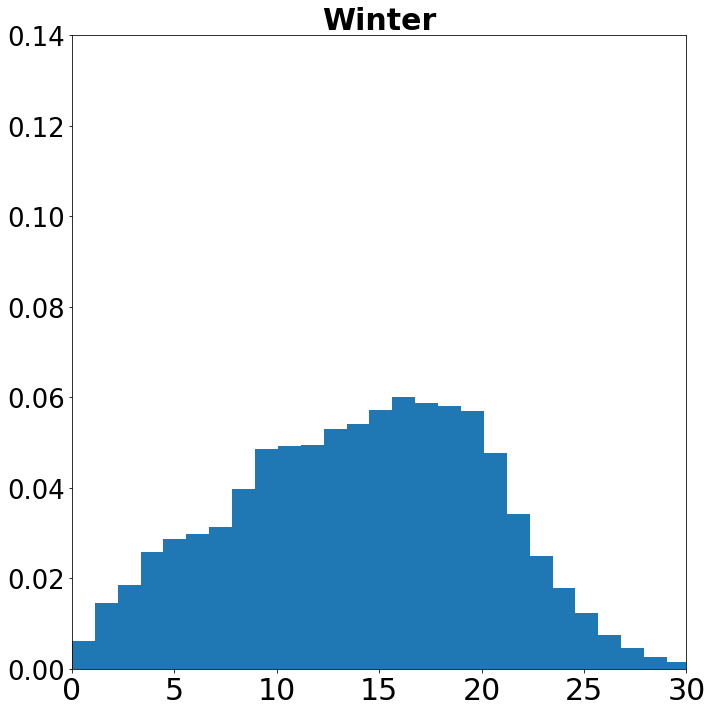

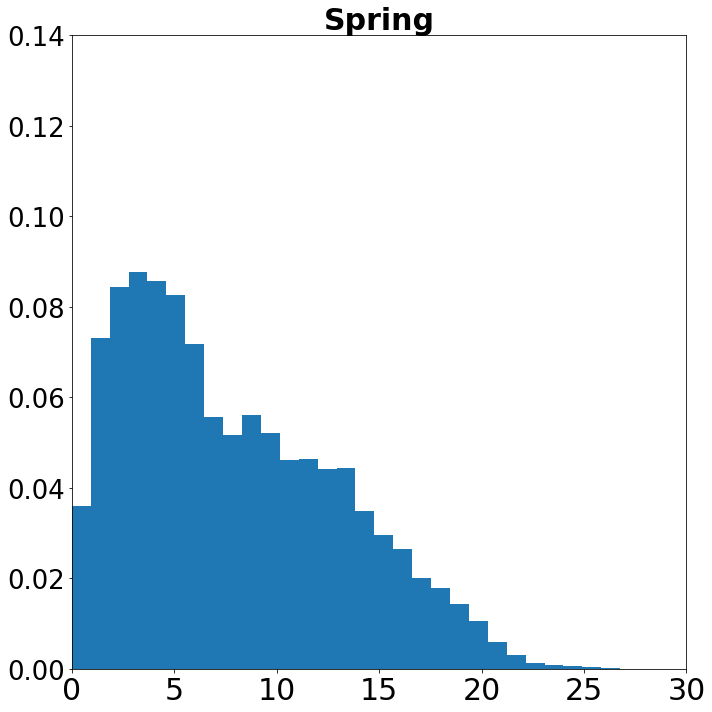

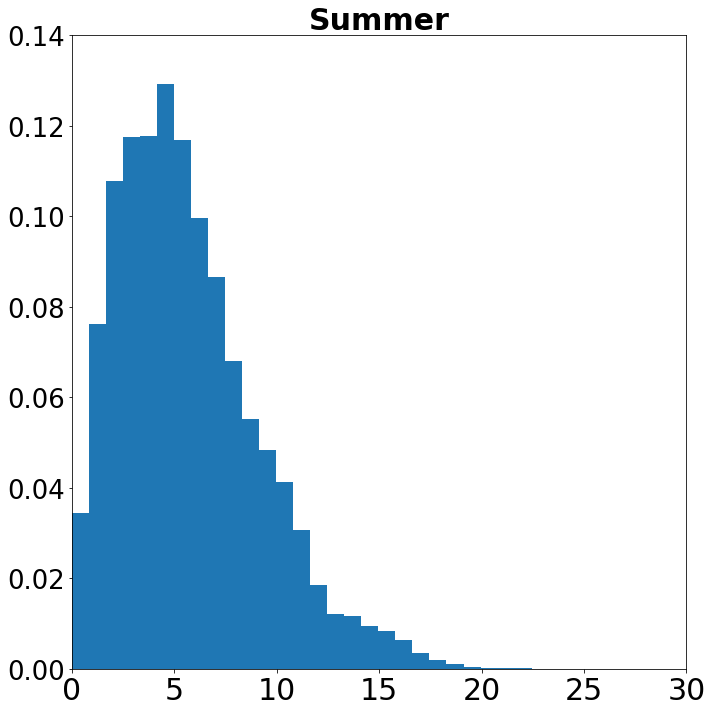

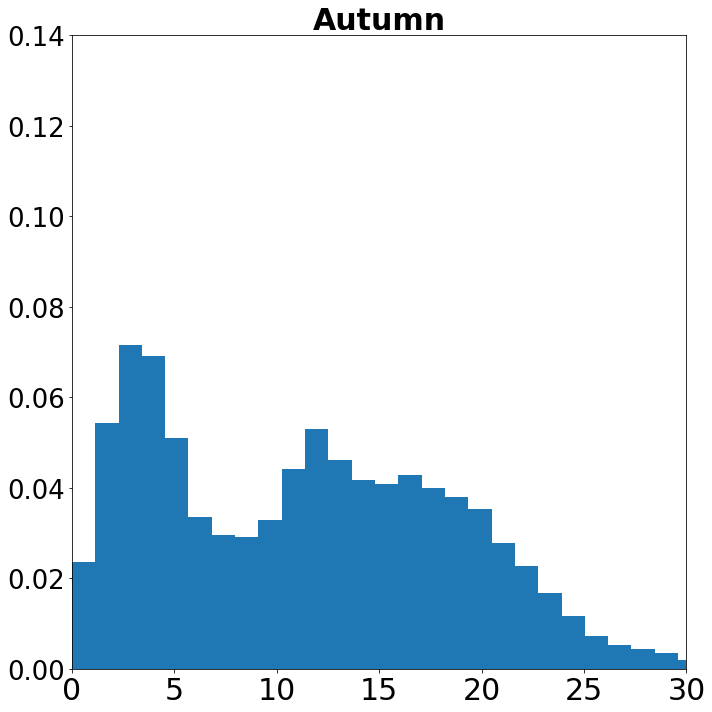

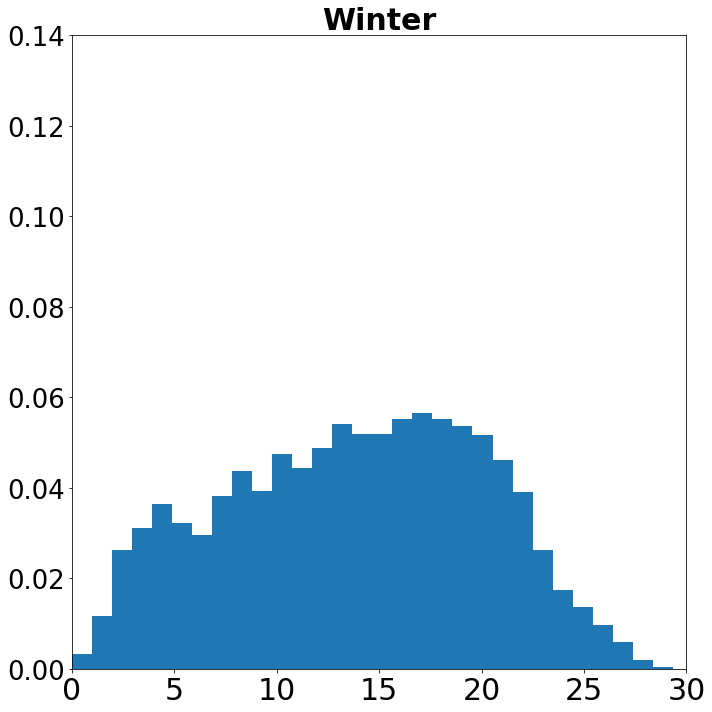

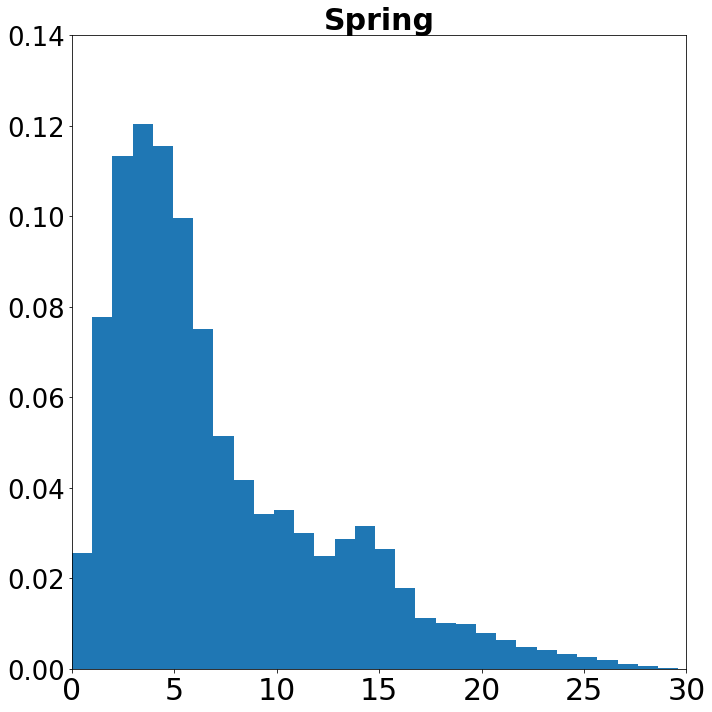

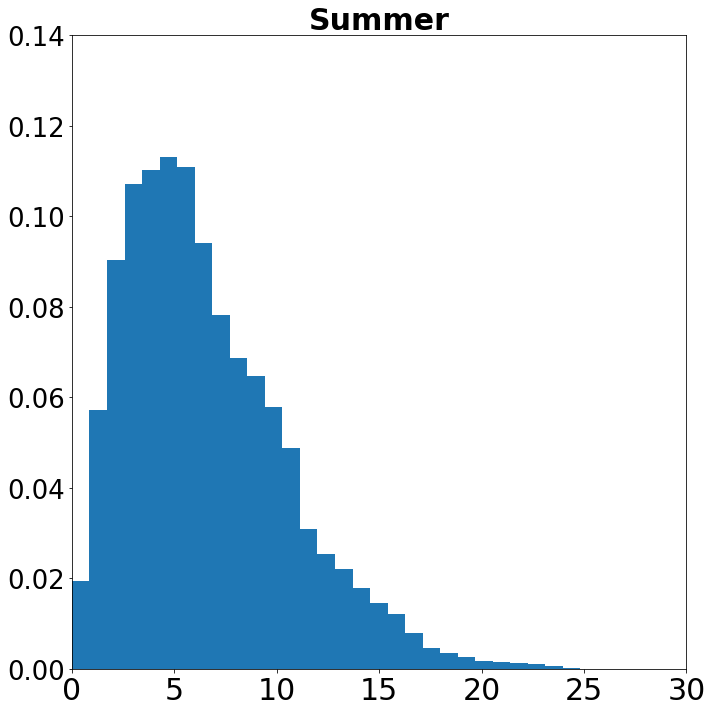

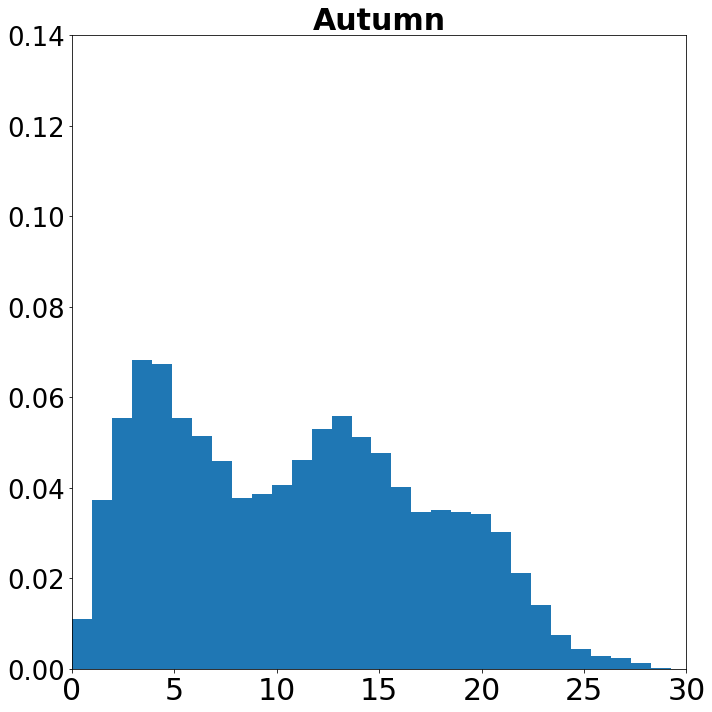

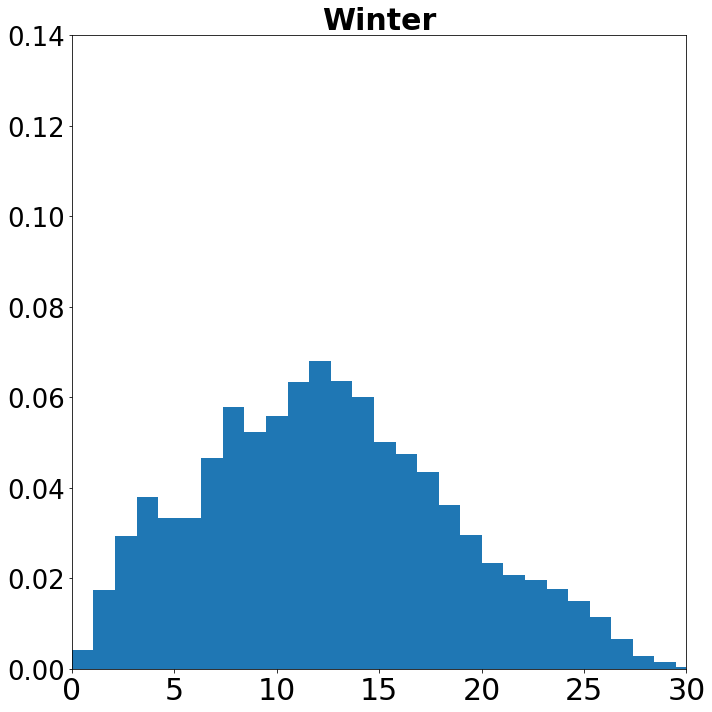

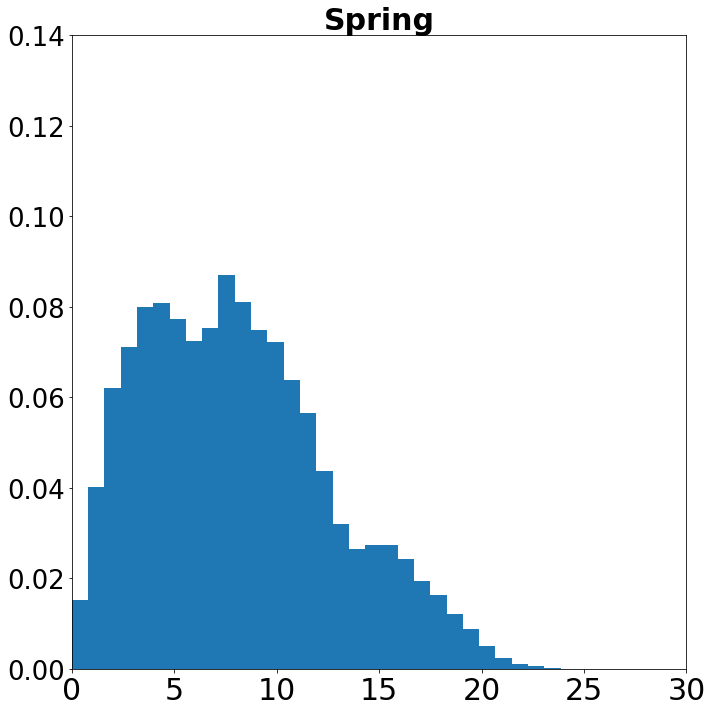

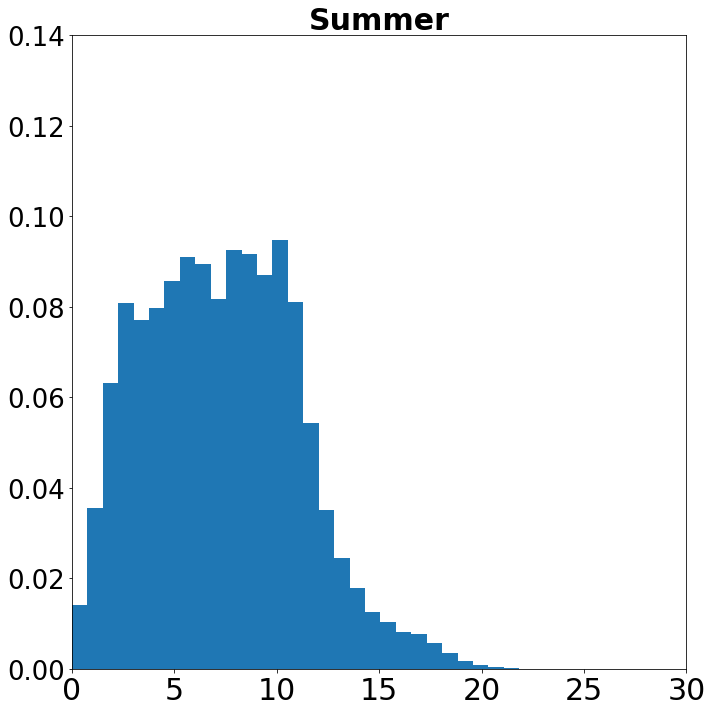

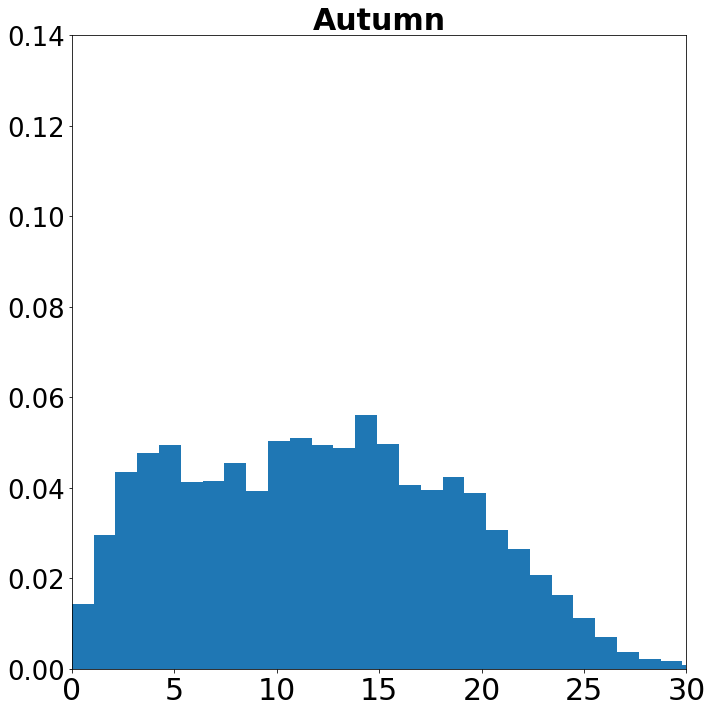

In [49]:
years = [2017,2018,2019]
for year in years:
    for j in range(4):
        Histogram_Season(df,year,j+1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Annually Histogram (2017~2019)')

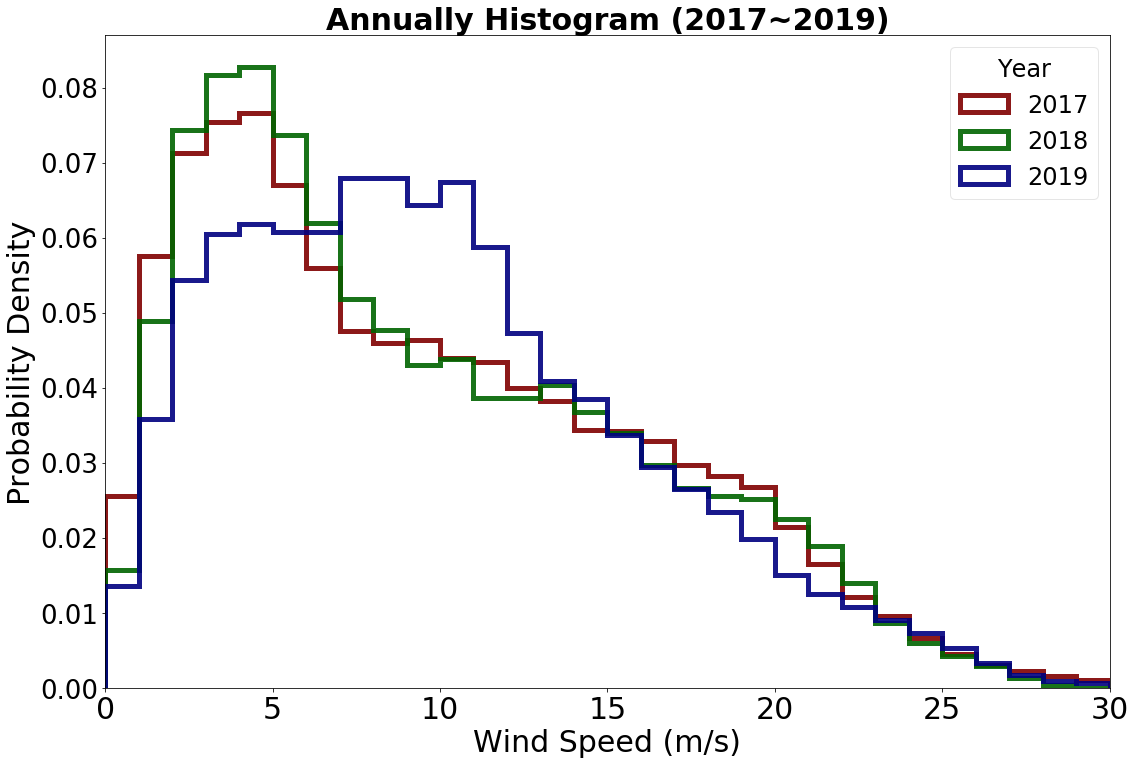

In [164]:
# Annually Histogram
years = [2017,2018,2019]
color = ['maroon','darkgreen','navy']
fig, ax = plt.subplots(1,1, figsize=(18,12), gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(len(years)):
    year = years[i]
    
    logicY = (df["DateTime"].apply(lambda x: x.year)==(year))
    df01 = df[logicY].copy()
    df_plot = df01[logicY].copy()
    sns.distplot(df_plot['WS95'],bins=30,norm_hist=True,label=year,color=color[i], 
                 hist_kws=dict(alpha=0.9,range=(0,30), histtype='step', linewidth=5),
                 kde=False,hist=True,ax=ax)
#ax.set_ylim(0,0.14)
ax.set_xlim(0,35)
ax.set_xticks([0,5,10,15,20,25,30,35])
ax.set_xlabel("Wind Speed (m/s)",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=26)
ax.legend(loc=1,title="Year",title_fontsize=24,fontsize=24,fancybox=True, framealpha=0.5)
ax.set_title('Annually Histogram (2017~2019)',fontweight='bold',size=30)